# **Importing Modules and Libraries**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from collections import Counter

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Datasets**

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15.csv')
data = pd.read_csv('/content/drive/MyDrive/ML Data sets/UNSW_NB15.csv')

In [4]:
data.head(n=10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
data[data['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175125,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
175179,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
175191,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
175277,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [7]:
data['service'].replace('-',np.nan,inplace=True)
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,NaN,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,NaN,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,NaN,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,NaN,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,NaN,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [8]:
data.isnull().sum()

,0
id,0
dur,0
proto,0
service,94168
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [9]:
data.shape

(175341, 45)

In [10]:
data.dropna(inplace=True)

In [11]:
data.shape

(81173, 45)

In [12]:
data['attack_cat'].value_counts()

,count
attack_cat,
Generic,39496
Normal,19488
Exploits,16187
DoS,1791
Fuzzers,1731
Reconnaissance,1703
Analysis,564
Worms,114
Backdoor,99


In [13]:
data['state'].value_counts()

,count
state,
INT,39580
FIN,33640
CON,7711
REQ,228
RST,14


In [14]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [15]:
#features = pd.read_csv('/content/drive/MyDrive/IoT_ML_Dataset/UNSW/UNSW_NB15_features.csv')
features = pd.read_csv('/content/drive/MyDrive/ML Data sets/UNSW_NB15_features.csv')

In [16]:
features.head()

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol


In [17]:
features['Type '] = features['Type '].str.lower()

In [18]:
# selecting column names of all data types
nominal_names = features['Name'][features['Type ']=='nominal']
integer_names = features['Name'][features['Type ']=='integer']
binary_names = features['Name'][features['Type ']=='binary']
float_names = features['Name'][features['Type ']=='float']

In [19]:
# selecting common column names from dataset and feature dataset
cols = data.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [20]:
# Converting integer columns to numeric
for c in integer_names:
  pd.to_numeric(data[c])

In [21]:
# Converting binary columns to numeric
for c in binary_names:
  pd.to_numeric(data[c])

In [22]:
# Converting float columns to numeric
for c in float_names:
  pd.to_numeric(data[c])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81173 entries, 3 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 81173 non-null  int64  
 1   dur                81173 non-null  float64
 2   proto              81173 non-null  object 
 3   service            81173 non-null  object 
 4   state              81173 non-null  object 
 5   spkts              81173 non-null  int64  
 6   dpkts              81173 non-null  int64  
 7   sbytes             81173 non-null  int64  
 8   dbytes             81173 non-null  int64  
 9   rate               81173 non-null  float64
 10  sttl               81173 non-null  int64  
 11  dttl               81173 non-null  int64  
 12  sload              81173 non-null  float64
 13  dload              81173 non-null  float64
 14  sloss              81173 non-null  int64  
 15  dloss              81173 non-null  int64  
 16  sinpkt             81173 n

In [24]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
11,12,2.093085,tcp,smtp,FIN,62,28,56329,2212,42.520967,...,1,2,0,0,0,1,1,0,Normal,0
15,16,0.000002,udp,snmp,INT,2,0,138,0,500000.001300,...,1,4,0,0,0,2,1,0,Normal,0
17,18,0.393556,tcp,http,FIN,10,8,860,1096,43.195886,...,1,2,0,0,1,1,3,0,Normal,0
21,22,0.338017,tcp,http,FIN,10,6,998,268,44.376468,...,1,1,0,0,1,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,175336,0.000006,udp,dns,INT,2,0,114,0,166666.660800,...,17,45,0,0,0,33,45,0,Generic,1
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


# **Data Visualization**

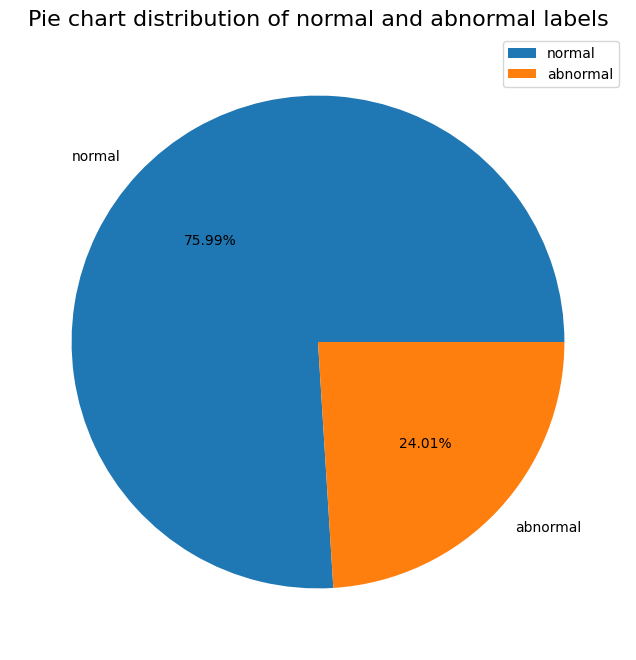

In [25]:
plt.figure(figsize=(8,8))
plt.pie(data.label.value_counts(),labels=['normal','abnormal'],autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels",fontsize=16)
plt.legend()
plt.show()

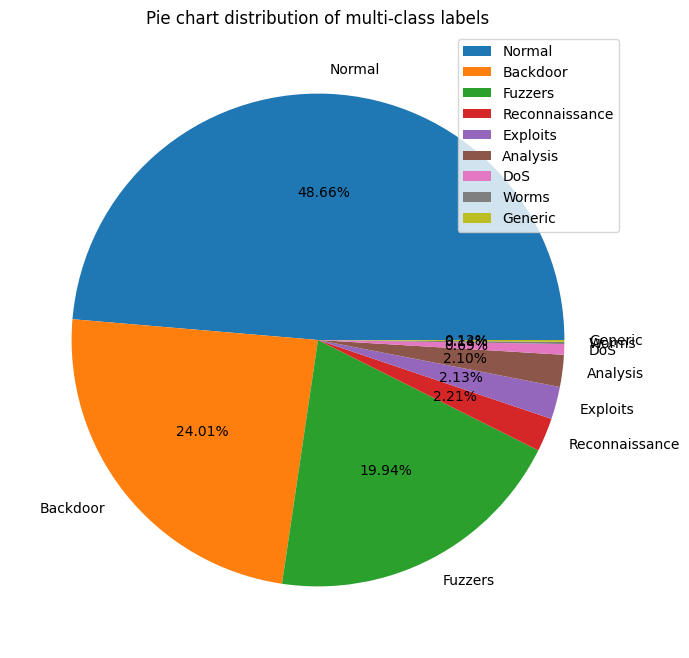

In [26]:
plt.figure(figsize=(8,8))
plt.pie(data.attack_cat.value_counts(),labels=data.attack_cat.unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend(loc='best')
plt.show()

# **One hot encoding**

In [27]:
num_col = data.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = data.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [28]:
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN


In [29]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [30]:
data_cat.head()

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
11,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
15,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
17,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False
21,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False


In [31]:
cat_col = ['proto', 'service', 'state']
# creating a dataframe with only categorical attributes
data_cat = data[cat_col].copy()
data_cat.head()

# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat, columns=cat_col).astype(int)
data_cat.head(10)

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
22,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
31,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
32,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
data_cat.shape

(81173, 19)

In [33]:
data.shape

(81173, 45)

In [34]:
data = pd.concat([data, data_cat],axis=1)

In [35]:
data.shape

(81173, 64)

In [36]:
data.drop(columns=cat_col,inplace=True)

In [37]:
data.shape

(81173, 61)

# **Data Normalization**


In [38]:
# selecting numeric attributes columns from data
num_col = list(data.select_dtypes(include='number').columns)
num_col.remove('id')
num_col.remove('label')
print(num_col)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [39]:
# using minmax scaler for normalizing data
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [40]:
# data before normalization
data.head(10)

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0
22,23,0.964656,14,12,690,950,25.915974,62,252,5.315885e+03,...,0,0,0,0,0,1,0,0,0,0
28,29,0.546425,10,8,1168,1040,31.111315,254,252,1.540193e+04,...,0,0,0,0,0,0,1,0,0,0
30,31,0.725996,10,16,822,12220,34.435451,62,252,8.154315e+03,...,0,0,0,0,0,0,1,0,0,0
31,32,0.274605,10,6,1228,268,54.623913,62,252,3.222083e+04,...,0,0,0,0,0,0,1,0,0,0
32,33,0.337456,10,8,800,2260,50.376940,62,252,1.706889e+04,...,0,0,0,0,0,0,1,0,0,0


In [41]:
data.shape

(81173, 61)

In [42]:
# calling normalization() function
data = normalization(data.copy(),num_col)

In [43]:
# data after normalization
data.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# **Label Encoding**

## **Binary Labels**

In [44]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(data.label.map(lambda x:'normal' if x==0 else 'abnormal'))

In [45]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = data.copy()
bin_data['label'] = bin_label

In [46]:
# label encoding (0,1) binary labels
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['label'] = enc_label

In [47]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [48]:
np.save("le1_classes.npy",le1.classes_,allow_pickle=True)

## **Multi-class Labels**

In [49]:
# one-hot-encoding attack label
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.attack_cat)

In [50]:
multi_data = pd.get_dummies(multi_data,columns=['attack_cat'])

In [51]:
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['label'] = enc_label

In [52]:
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [53]:
np.save("le2_classes.npy",le2.classes_,allow_pickle=True)

In [54]:
num_col.append('label')
corr_bin = bin_data[num_col].corr()
num_col = list(multi_data.select_dtypes(include='number').columns)
corr_multi = multi_data[num_col].corr()

# **Feature Selection**

## **Binary Labels**

In [55]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.3]
highest_corr_bin.sort_values(ascending=True)

,label
sload,0.334562
dload,0.343910
rate,0.344535
ct_src_ltm,0.368486
ct_dst_ltm,0.387358
ct_src_dport_ltm,0.444874
ct_srv_dst,0.459984
ct_srv_src,0.463153
ct_dst_src_ltm,0.463735
ct_dst_sport_ltm,0.497234


In [56]:
# selecting attributes found by using pearson correlation coefficient
bin_cols = highest_corr_bin.index
bin_cols

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

In [57]:
# Binary labelled Dataset
bin_data = bin_data[bin_cols].copy()
bin_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


### **Saving Prepared Dataset to Disk**

## **Multi-class Labels**

In [58]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute
corr_ymulti = abs(corr_multi['label'])
highest_corr_multi = corr_ymulti[corr_ymulti >0.3]
highest_corr_multi.sort_values(ascending=True)

,label
state_CON,0.302853
state_FIN,0.361750
proto_udp,0.364393
swin,0.364393
dwin,0.364393
proto_tcp,0.364393
service_dns,0.365346
synack,0.524027
ackdat,0.570098
tcprtt,0.570205


In [59]:
# selecting attributes found by using pearson correlation coefficient
multi_cols = highest_corr_multi.index
multi_cols

Index(['dttl', 'swin', 'dwin', 'tcprtt', 'synack', 'ackdat', 'label',
       'proto_tcp', 'proto_udp', 'service_dns', 'state_CON', 'state_FIN'],
      dtype='object')

In [60]:
# Multi-class labelled Dataset
multi_data = multi_data[multi_cols].copy()
multi_data

,dttl,swin,dwin,tcprtt,synack,ackdat,label,proto_tcp,proto_udp,service_dns,state_CON,state_FIN
3,0.992126,1.0,1.0,0.000000,0.000000,0.000000,6,1.0,0.0,0.0,0.0,1.0
11,0.992126,1.0,1.0,0.087972,0.103000,0.054975,6,1.0,0.0,0.0,0.0,1.0
15,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6,0.0,1.0,0.0,0.0,0.0
17,0.992126,1.0,1.0,0.080709,0.115373,0.042914,6,1.0,0.0,0.0,0.0,1.0
21,0.992126,1.0,1.0,0.103597,0.107399,0.069747,6,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0
175336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0
175338,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0
175339,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0


### **Saving Prepared Dataset to Disk**

# **BINARY CLASSIFICATION**

## **Data Splitting**



In [61]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)
# Define the PCA pipeline
pca_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Standardize features
    ('pca', PCA(n_components=0.95))  # Retain 95% of variance
])

# Fit and transform the training data
X_train_pca = pca_pipeline.fit_transform(X_train)

# Transform the testing data (using parameters learned from training data)
X_test_pca = pca_pipeline.transform(X_test)

# Check the number of components retained after PCA
print("Number of components retained after PCA:", pca_pipeline.named_steps['pca'].n_components_)

Number of components retained after PCA: 5


## **Random Forest Classifier**

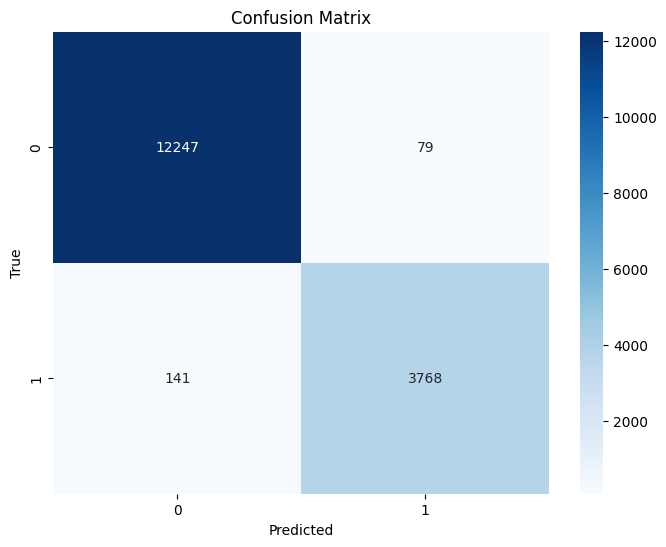

Mean Absolute Error -  0.013550970126270403
Mean Squared Error -  0.013550970126270403
Root Mean Squared Error -  0.1164086342427846
R2 Score -  92.59509512345335
True Negatives (TN): 12247
True Positives (TP): 3768
False Positives (FP): 79
False Negatives (FN): 141
Sensitivity (Recall): 0.9639293937068304
Specificity: 0.9935907837092325
Precision: 0.9794645178060827
F1 Score: 0.9716348633316142
R1 Score: 0.9716348633316142
Recall (Sensitivity): 0.9639293937068304
Accuracy -  98.64490298737296


In [63]:

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),              # Preprocessing step: feature scaling
    ('clf', RandomForestClassifier(random_state=123))   # Estimator (model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Calculate and print evaluation metrics
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - ", metrics.explained_variance_score(y_test, y_pred) * 100)
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)



print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)

print("Recall (Sensitivity):", recall)
print("Accuracy - ", accuracy_score(y_test, y_pred) * 100)



In [64]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=le1.classes_)
print(cls_report)

              precision    recall  f1-score   support

    abnormal       0.99      0.99      0.99     12326
      normal       0.98      0.96      0.97      3909

    accuracy                           0.99     16235
   macro avg       0.98      0.98      0.98     16235
weighted avg       0.99      0.99      0.99     16235



### **Real and Predicted Data**

In [65]:
rf_bin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_bin_df

,Actual,Predicted
159889,0,0
125506,0,0
158979,0,0
8148,1,1
39918,1,1
...,...,...
68470,0,0
159674,0,0
171321,0,0
125777,0,0


### **Plot between Real and Predicted Data**

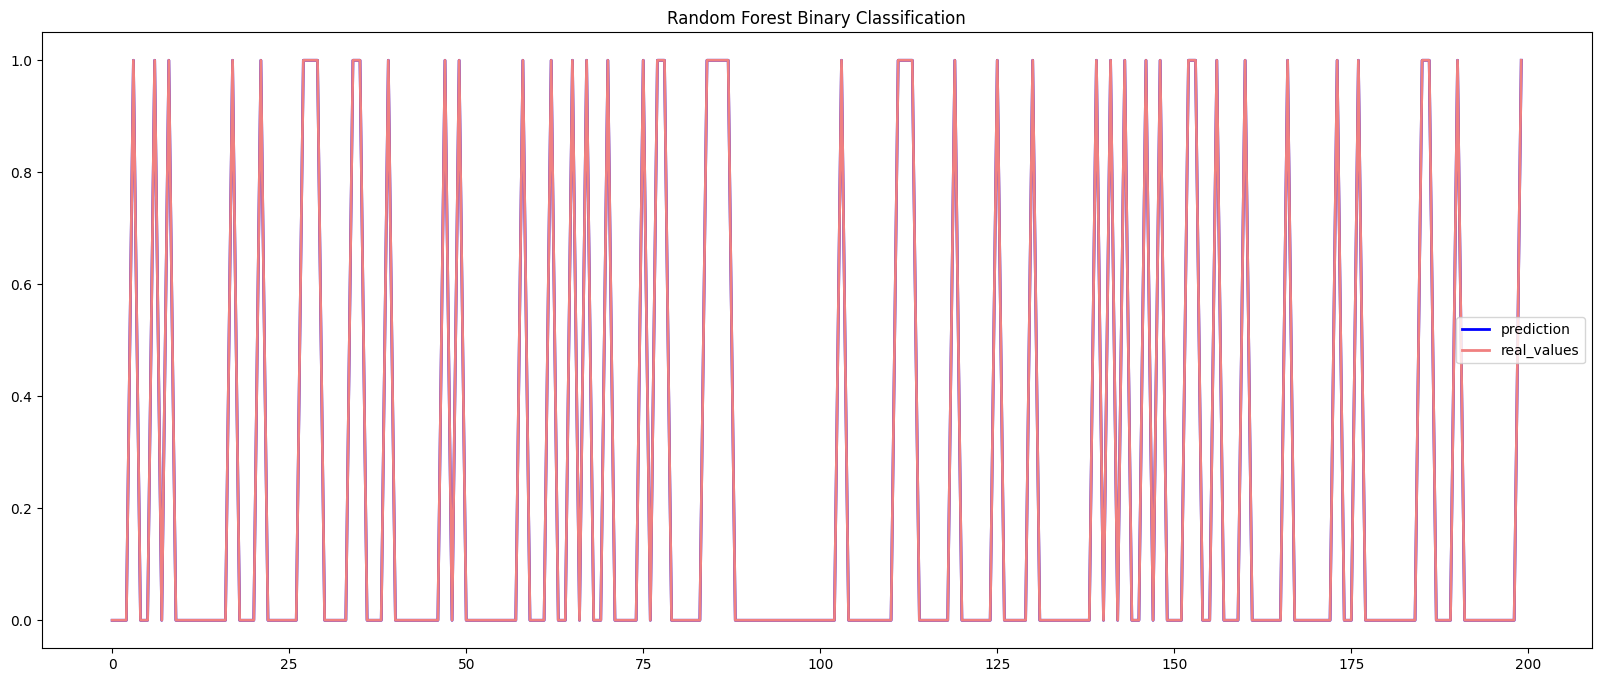

In [66]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[200:400], label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[200:400].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Binary Classification")
plt.show()

# ***ExtraTreesClassifier***

True Negatives (TN): 12226
True Positives (TP): 3769
False Positives (FP): 100
False Negatives (FN): 140


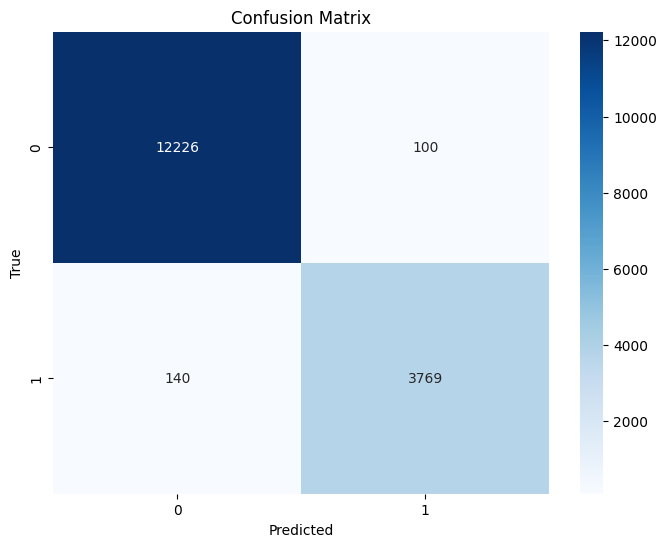

Sensitivity (Recall): 0.9641852136096188
Specificity: 0.9918870679863703
Precision: 0.974153528043422
F1 Score: 0.9691437387503214
R1 Score: 0.9691437387503214
Recall (Sensitivity): 0.9641852136096188
Mean Absolute Error: 0.014782876501385895
Mean Squared Error: 0.014782876501385895
Root Mean Squared Error: 0.12158485309192875
R2 Score: 91.91653936897288
Accuracy: 98.52171234986142


In [67]:
model = ExtraTreesClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Preprocessing step: feature scaling
    ('ada', ExtraTreesClassifier(random_state=42))  # Estimator (model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.explained_variance_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)
print("Recall (Sensitivity):", recall)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score)
print("Accuracy:", accuracy)


# **XGBoost Classifier**

True Negatives (TN): 12237
True Positives (TP): 3780
False Positives (FP): 89
False Negatives (FN): 129


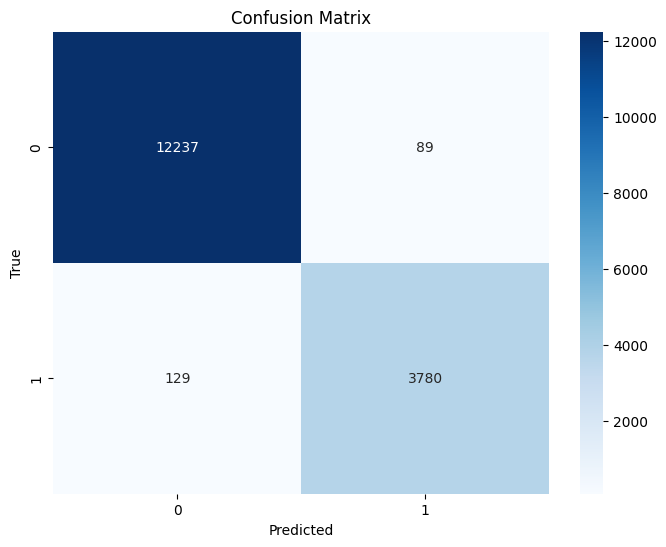

Sensitivity (Recall): 0.9669992325402916
Specificity: 0.9927794905078695
Precision: 0.9769966399586456
F1 Score: 0.9719722293648753
R1 Score: 0.9719722293648753
Recall (Sensitivity): 0.9669992325402916
Mean Absolute Error: 0.013427779488758854
Mean Squared Error: 0.013427779488758854
Root Mean Squared Error: 0.11587829602112232
R2 Score: 92.65782765940729
AUC- 97.98893615240806
Accuracy: 98.65722205112412


In [68]:

# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Preprocessing step: feature scaling
    ('ada', xgb.XGBClassifier(random_state=123))  # Estimator (model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.explained_variance_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)
print("Recall (Sensitivity):", recall)

# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score)
print('AUC-', roc_auc_score(y_test, y_pred)*100)
print("Accuracy:", accuracy)


# **AdaBoostClassifier**

True Negatives (TN): 12262
True Positives (TP): 3706
False Positives (FP): 64
False Negatives (FN): 203


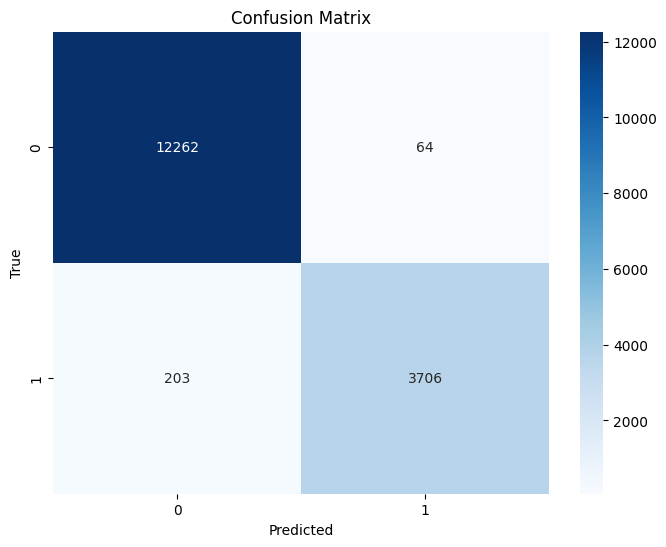

Sensitivity (Recall): 0.9480685597339473
Specificity: 0.994807723511277
Precision: 0.9830238726790451
F1 Score: 0.965229847636411
R1 Score: 0.965229847636411
Recall (Sensitivity): 0.9480685597339473
Mean Absolute Error: 0.016445950107791808
Mean Squared Error: 0.016445950107791808
Root Mean Squared Error: 0.12824176428836204
R2 Score: 91.04355550729444
AUC- 97.14381416226121
Accuracy: 98.35540498922082


In [69]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Preprocessing step: feature scaling
    ('ada', AdaBoostClassifier(random_state=123))  # Estimator (model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = metrics.explained_variance_score(y_test, y_pred) * 100
accuracy = accuracy_score(y_test, y_pred) * 100
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)
print("Recall (Sensitivity):", recall)
# Print evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2_score)
print('AUC-', roc_auc_score(y_test, y_pred)*100)
print("Accuracy:", accuracy)


# ***SGD Classifier***

True Negatives (TN): 12311
True Positives (TP): 3575
False Positives (FP): 15
False Negatives (FN): 334


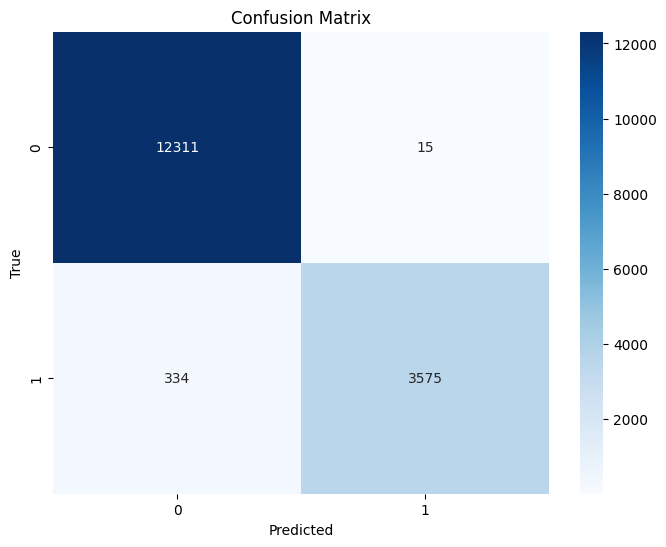

Sensitivity (Recall): 0.9145561524686621
Specificity: 0.9987830601979555
Precision: 0.9958217270194986
F1 Score: 0.9534604613948527
R1 Score: 0.9534604613948527
Recall (Sensitivity): 0.9145561524686621
Mean Absolute Error -  0.021496766245765322
Mean Squared Error -  0.021496766245765322
Root Mean Squared Error -  0.1466177555610688
R2 Score -  88.45167193436498
Accuracy -  97.85032337542347


In [70]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),              # Preprocessing step: feature scaling
    ('clf', SGDClassifier())   # Estimator (model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)
print("Recall (Sensitivity):", recall)

# Calculate and print evaluation metrics
print("Mean Absolute Error - ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - ", metrics.explained_variance_score(y_test, y_pred) * 100)
print("Accuracy - ", accuracy_score(y_test, y_pred) * 100)

# ***Ensemble Method***

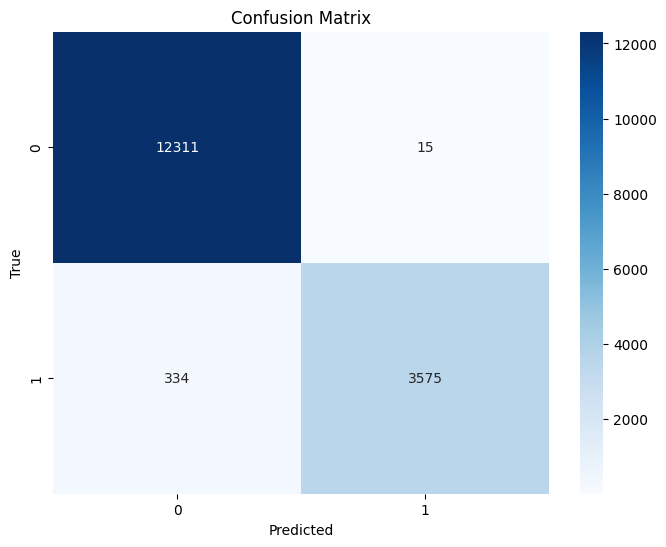

True Negatives (TN): 12311
True Positives (TP): 3575
False Positives (FP): 15
False Negatives (FN): 334
Sensitivity (Recall): 0.9145561524686621
Specificity: 0.9987830601979555
Precision: 0.9958217270194986
F1 Score: 0.9534604613948527
R1 Score: 0.9534604613948527
Recall (Sensitivity): 0.9145561524686621
AUC- 95.66696063333087
Accuracy: 98.64490298737296


In [71]:
# Define the individual models
model1 =ExtraTreesClassifier()

model2=AdaBoostClassifier()
model3=xgb.XGBClassifier(random_state=123)
# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)])
# Train the ensemble model
ensemble_model.fit(X_train, y_train)
# Calculate True Negatives (TN), True Positives (TP), False Positives (FP), False Negatives (FN)
TN = ((y_pred == 0) & (y_test == 0)).sum()
TP = ((y_pred == 1) & (y_test == 1)).sum()
FP = ((y_pred == 1) & (y_test == 0)).sum()
FN = ((y_pred == 0) & (y_test == 1)).sum()

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("True Negatives (TN):", TN)
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
# Calculate Sensitivity (Recall)
sensitivity = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate R1 Score
r1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)
print("R1 Score:", r1_score)
print("Recall (Sensitivity):", recall)

# Make predictions and evaluate the model
predictions = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)*100
print('AUC-', roc_auc_score(y_test, y_pred)*100)
print("Accuracy:", accuracy)
